# Dataset created used to display in this Colab is using [makesense.ai](https://www.makesense.ai/) to create the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change this for different location to display

# Define your folder path
#folder_path = '/content/drive/MyDrive/Object Detection/data/labels_my-project-name_2025-09-15-11-30-27'
# Define the filepath
filepath = "/content/drive/MyDrive/Object Detection/data/labels_my-project-name_2025-09-15-11-30-27/frame_20250915_112032_248209.xml"
# Define folder path of images and label
labels_folder = '/content/drive/MyDrive/Object Detection/data/labels_my-project-name_2025-09-15-11-30-27'
images_folder = '/content/drive/MyDrive/Object Detection/data/captured_frames'

In [ ]:
import os
import xml.etree.ElementTree as ET


# List all XML files in the folder
xml_files = [f for f in os.listdir(labels_folder) if f.endswith('.xml')]
print(f"Found {len(xml_files)} XML files")

# Iterate through each XML file
for xml_file in xml_files:
    file_path = os.path.join(labels_folder, xml_file)

    # Parse the XML
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract basic information
    filename = root.find('filename').text
    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text

    # Count objects
    objects = root.findall('object')

    print(f"\nFile: {xml_file}")
    print(f"Image: {filename}")
    print(f"Dimensions: {width}x{height}")
    print(f"Objects detected: {len(objects)}")

    # List all objects
    for obj in objects:
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        ymin = bndbox.find('ymin').text
        xmax = bndbox.find('xmax').text
        ymax = bndbox.find('ymax').text
        print(f"  - {name}: [{xmin}, {ymin}, {xmax}, {ymax}]")

Found 94 XML files

File: frame_20250915_112037_964658.xml
Image: frame_20250915_112037_964658.jpg
Dimensions: 1280x720
Objects detected: 1
  - person: [400, 278, 817, 719]

File: frame_20250915_112036_939851.xml
Image: frame_20250915_112036_939851.jpg
Dimensions: 1280x720
Objects detected: 1
  - person: [396, 277, 816, 719]

File: frame_20250915_112032_248209.xml
Image: frame_20250915_112032_248209.jpg
Dimensions: 1280x720
Objects detected: 2
  - glasses: [530, 371, 684, 424]
  - person: [390, 292, 826, 714]

File: frame_20250915_112031_724978.xml
Image: frame_20250915_112031_724978.jpg
Dimensions: 1280x720
Objects detected: 2
  - glasses: [538, 375, 697, 426]
  - person: [386, 279, 826, 716]

File: frame_20250915_112035_926242.xml
Image: frame_20250915_112035_926242.jpg
Dimensions: 1280x720
Objects detected: 1
  - person: [377, 283, 866, 718]

File: frame_20250915_112035_398535.xml
Image: frame_20250915_112035_398535.jpg
Dimensions: 1280x720
Objects detected: 2
  - person: [344, 275,

In [ ]:
import pandas as pd

# Create a summary of your dataset
data_summary = []

for xml_file in xml_files:
    file_path = os.path.join(labels_folder, xml_file)
    tree = ET.parse(file_path)
    root = tree.getroot()

    objects = root.findall('object')
    object_types = [obj.find('name').text for obj in objects]

    data_summary.append({
        'filename': root.find('filename').text,
        'xml_file': xml_file,
        'width': root.find('size/width').text,
        'height': root.find('size/height').text,
        'object_count': len(objects),
        'object_types': ', '.join(object_types)
    })

# Convert to DataFrame for better visualization
df = pd.DataFrame(data_summary)
print("Dataset Summary:")
print(df.head())  # Show first few entries

# Show object distribution
print("\nObject Type Distribution:")
object_counts = {}
for types in df['object_types']:
    for obj_type in types.split(', '):
        object_counts[obj_type] = object_counts.get(obj_type, 0) + 1

for obj_type, count in object_counts.items():
    print(f"{obj_type}: {count}")

Dataset Summary:
                           filename                          xml_file width  \
0  frame_20250915_112037_964658.jpg  frame_20250915_112037_964658.xml  1280   
1  frame_20250915_112036_939851.jpg  frame_20250915_112036_939851.xml  1280   
2  frame_20250915_112032_248209.jpg  frame_20250915_112032_248209.xml  1280   
3  frame_20250915_112031_724978.jpg  frame_20250915_112031_724978.xml  1280   
4  frame_20250915_112035_926242.jpg  frame_20250915_112035_926242.xml  1280   

  height  object_count     object_types  
0    720             1           person  
1    720             1           person  
2    720             2  glasses, person  
3    720             2  glasses, person  
4    720             1           person  

Object Type Distribution:
person: 95
glasses: 75
phone: 11


In [ ]:
# Load and display a VOC XML file to understand its structure
import xml.etree.ElementTree as ET
import os

# Parse XML file
tree = ET.parse(filepath)
root = tree.getroot()

# Display basic information
filename = root.find('filename').text
print(f"Image: {filename}")

# Display image size
size = root.find('size')
width = size.find('width').text
height = size.find('height').text
print(f"Dimensions: {width}x{height}")

# Display objects
print("\nObjects in image:")
for obj in root.findall('object'):
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text
    print(f"- {name}: [{xmin}, {ymin}, {xmax}, {ymax}]")

Image: frame_20250915_112032_248209.jpg
Dimensions: 1280x720

Objects in image:
- glasses: [530, 371, 684, 424]
- person: [390, 292, 826, 714]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (adjust test_size and random_state as needed)
train_files, test_val_files = train_test_split(xml_files, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

print(f"Training set: {len(train_files)} files")
print(f"Validation set: {len(val_files)} files")
print(f"Test set: {len(test_files)} files")

# You can save these splits to use later
import json

split_data = {
    'train': train_files,
    'val': val_files,
    'test': test_files
}

with open('data_split.json', 'w') as f:
    json.dump(split_data, f)

print("Data split saved to data_split.json")

Training set: 65 files
Validation set: 14 files
Test set: 15 files
Data split saved to data_split.json


Displaying: frame_20250915_112037_964658.jpg
Image path: /content/drive/MyDrive/Object Detection/data/captured_frames/frame_20250915_112037_964658.jpg


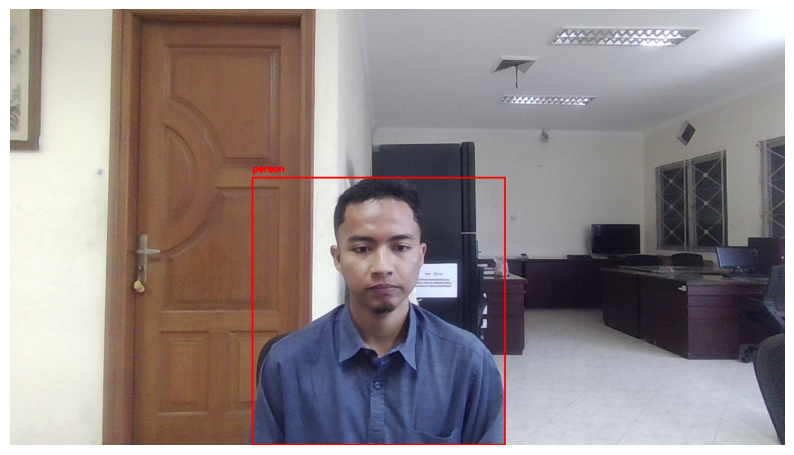

Displaying: frame_20250915_112036_939851.jpg
Image path: /content/drive/MyDrive/Object Detection/data/captured_frames/frame_20250915_112036_939851.jpg


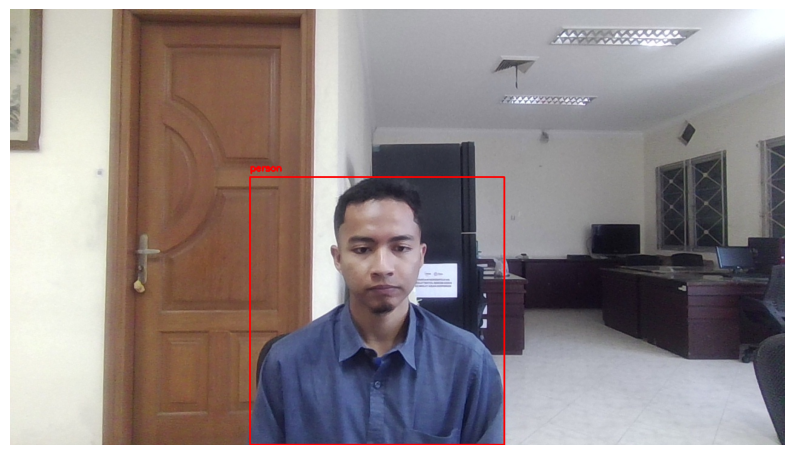

Displaying: frame_20250915_112032_248209.jpg
Image path: /content/drive/MyDrive/Object Detection/data/captured_frames/frame_20250915_112032_248209.jpg


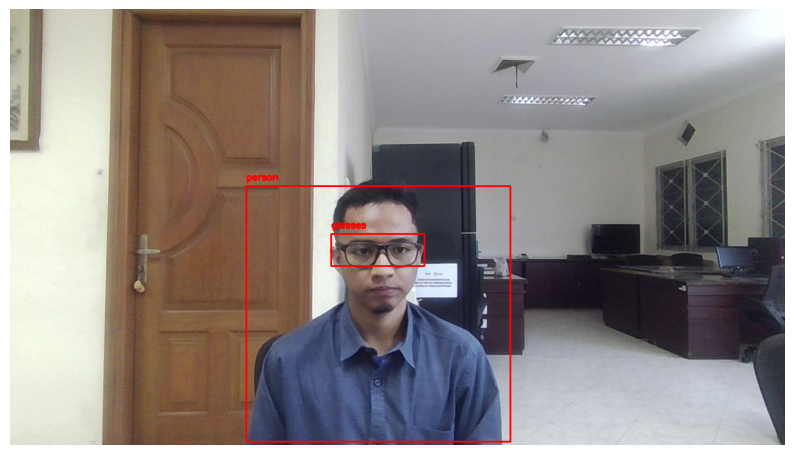

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, annotations):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load image: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes
    for obj in annotations.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Draw rectangle
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        # Add label
        cv2.putText(img, name, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display a few sample images
sample_files = xml_files[:3]  # First 3 XML files

for xml_file in sample_files:
    file_path = os.path.join(labels_folder, xml_file)
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Get image filename from XML
    image_filename = root.find('filename').text

    # Construct the correct image path
    image_path = os.path.join(images_folder, image_filename)

    print(f"Displaying: {image_filename}")
    print(f"Image path: {image_path}")

    # Display the image with bounding boxes
    display_image_with_boxes(image_path, root)

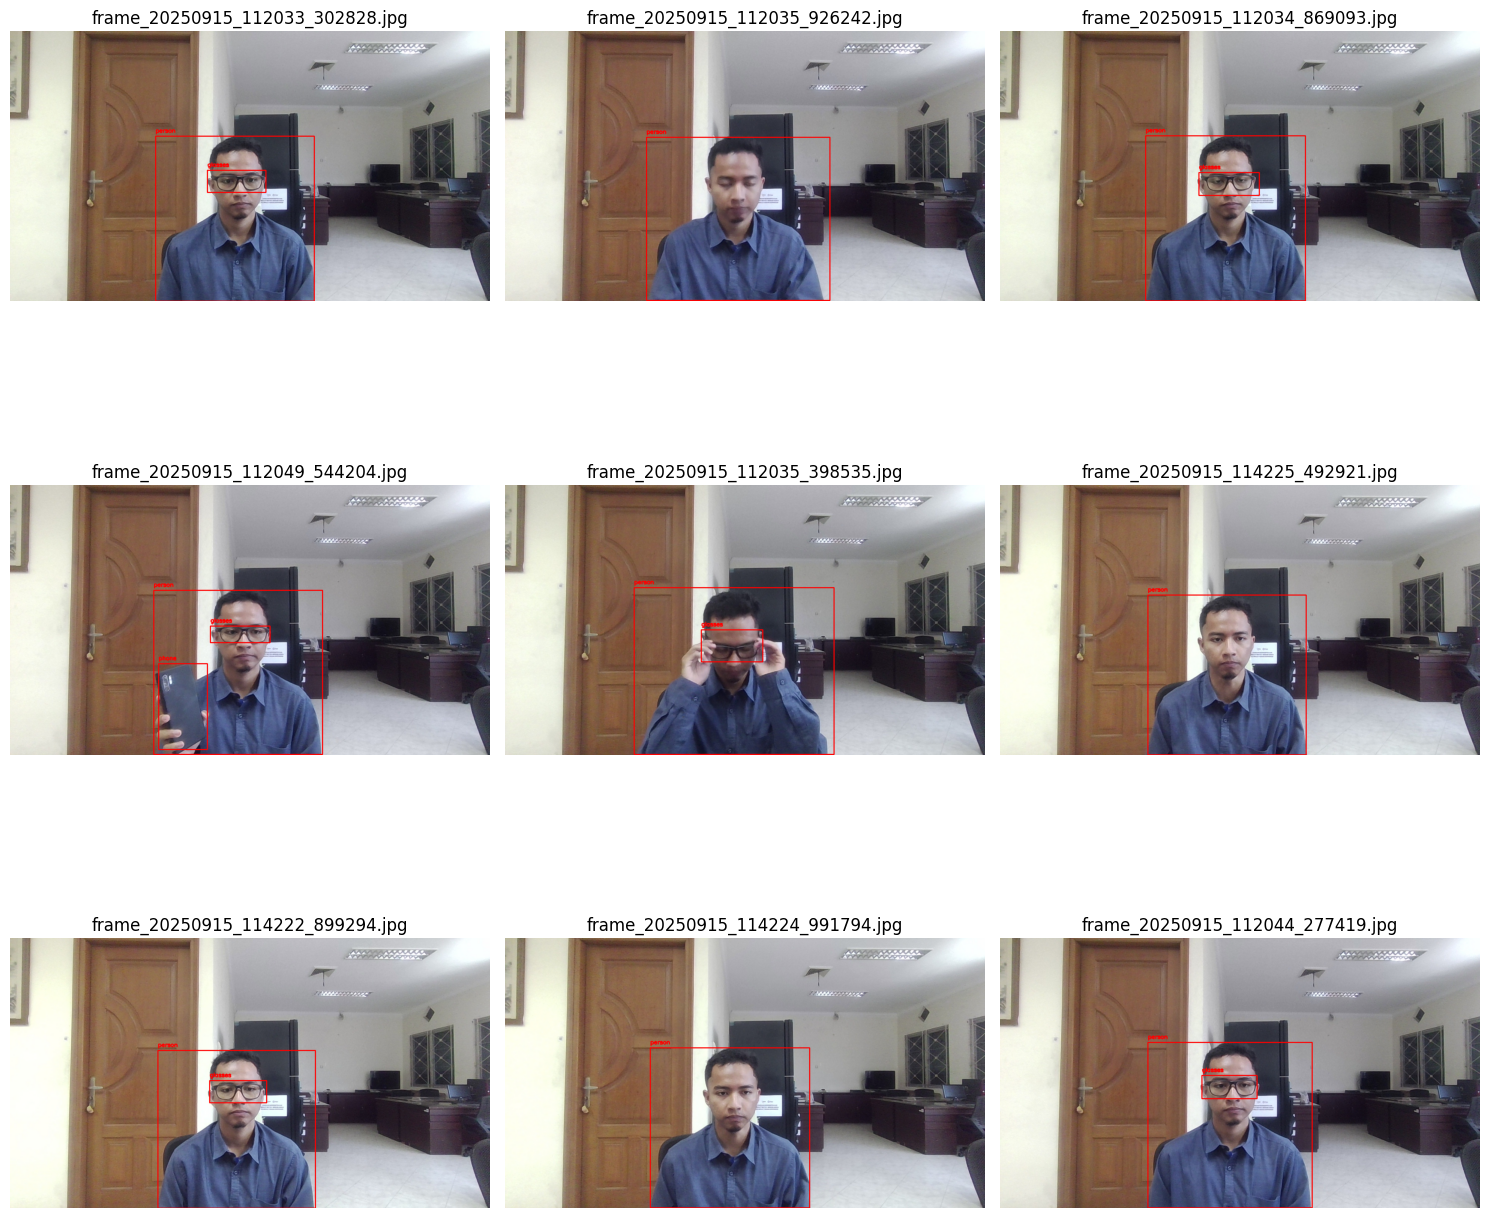

In [ ]:
def visualize_dataset_sample(labels_folder, images_folder, num_samples=9):
    import random
    import math

    # Get random sample of XML files
    sample_files = random.sample(xml_files, min(num_samples, len(xml_files)))

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_samples))

    # Create subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    axes = axes.flatten()

    for i, xml_file in enumerate(sample_files):
        if i >= num_samples:
            break

        file_path = os.path.join(labels_folder, xml_file)
        tree = ET.parse(file_path)
        root = tree.getroot()

        image_filename = root.find('filename').text
        image_path = os.path.join(images_folder, image_filename)

        # Read and process image
        img = cv2.imread(image_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Draw bounding boxes
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
            cv2.putText(img, name, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Display image
        axes[i].imshow(img)
        axes[i].set_title(image_filename)
        axes[i].axis('off')

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Use the function
visualize_dataset_sample(labels_folder, images_folder, num_samples=9)